# Data pre-processing

This section will focus on preparing the data for the EDA stage, this includes loading, understanding and cleaning (where necessary) the data.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt # Sets up our matplotlib functions
import seaborn as sns

In [3]:
df = pd.read_csv('data/house_prices.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Removes features with limited and data with no relavance to the model (`Id`)

In [6]:
df.drop(columns=['PoolQC','Fence','MiscFeature','Alley','Id'],inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# EDA

To better understand the target variable it is important to use a range of EDA techniques to understand the trends and patterns of the data.

- Descriptive statistics: Procide insights into the average, variability and more.

- Histograms: Help to determine the distribution of `SalePrice`. If the distribution is skewed then it can help to inform of modelling techniques. The `bin` paaramter allows for a greater detail by breaking it up into buckets.

Later on we will use different techniques to compare relevant features to the target variable of `SalePrice`, these include:
- Box-plots
- Bar-charts
- Scatter-plots
- Heatmaps

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

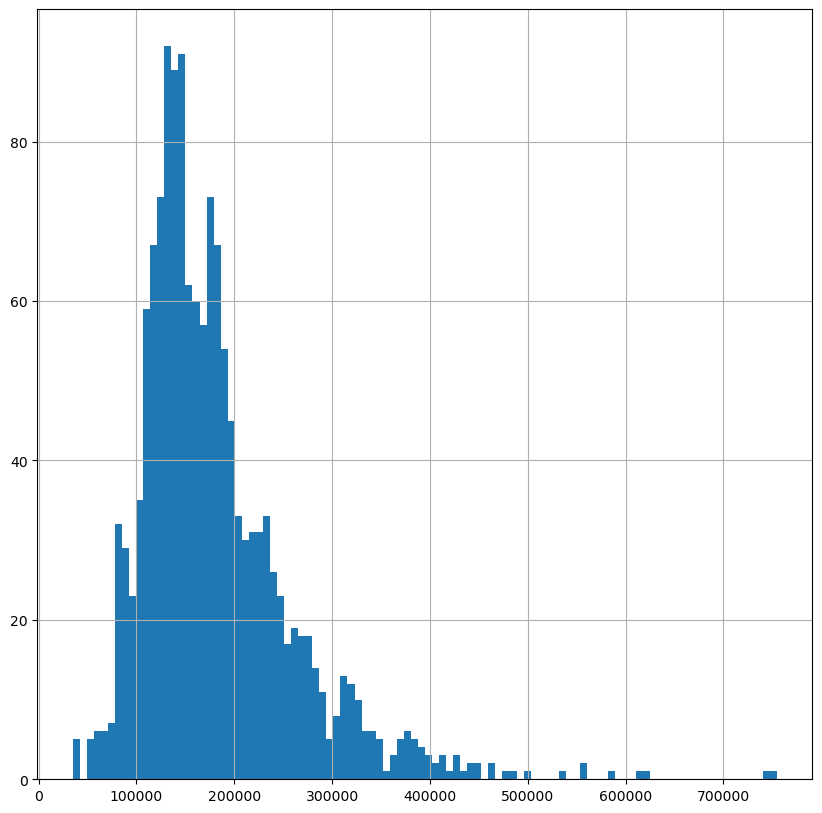

In [8]:
df['SalePrice'].hist(figsize=(10,10),bins=100)

Plotting all numerical features into Histograms allows us to see the similar distributions of various features. This informs us of potential correlations that may be in place throughout the dataset.

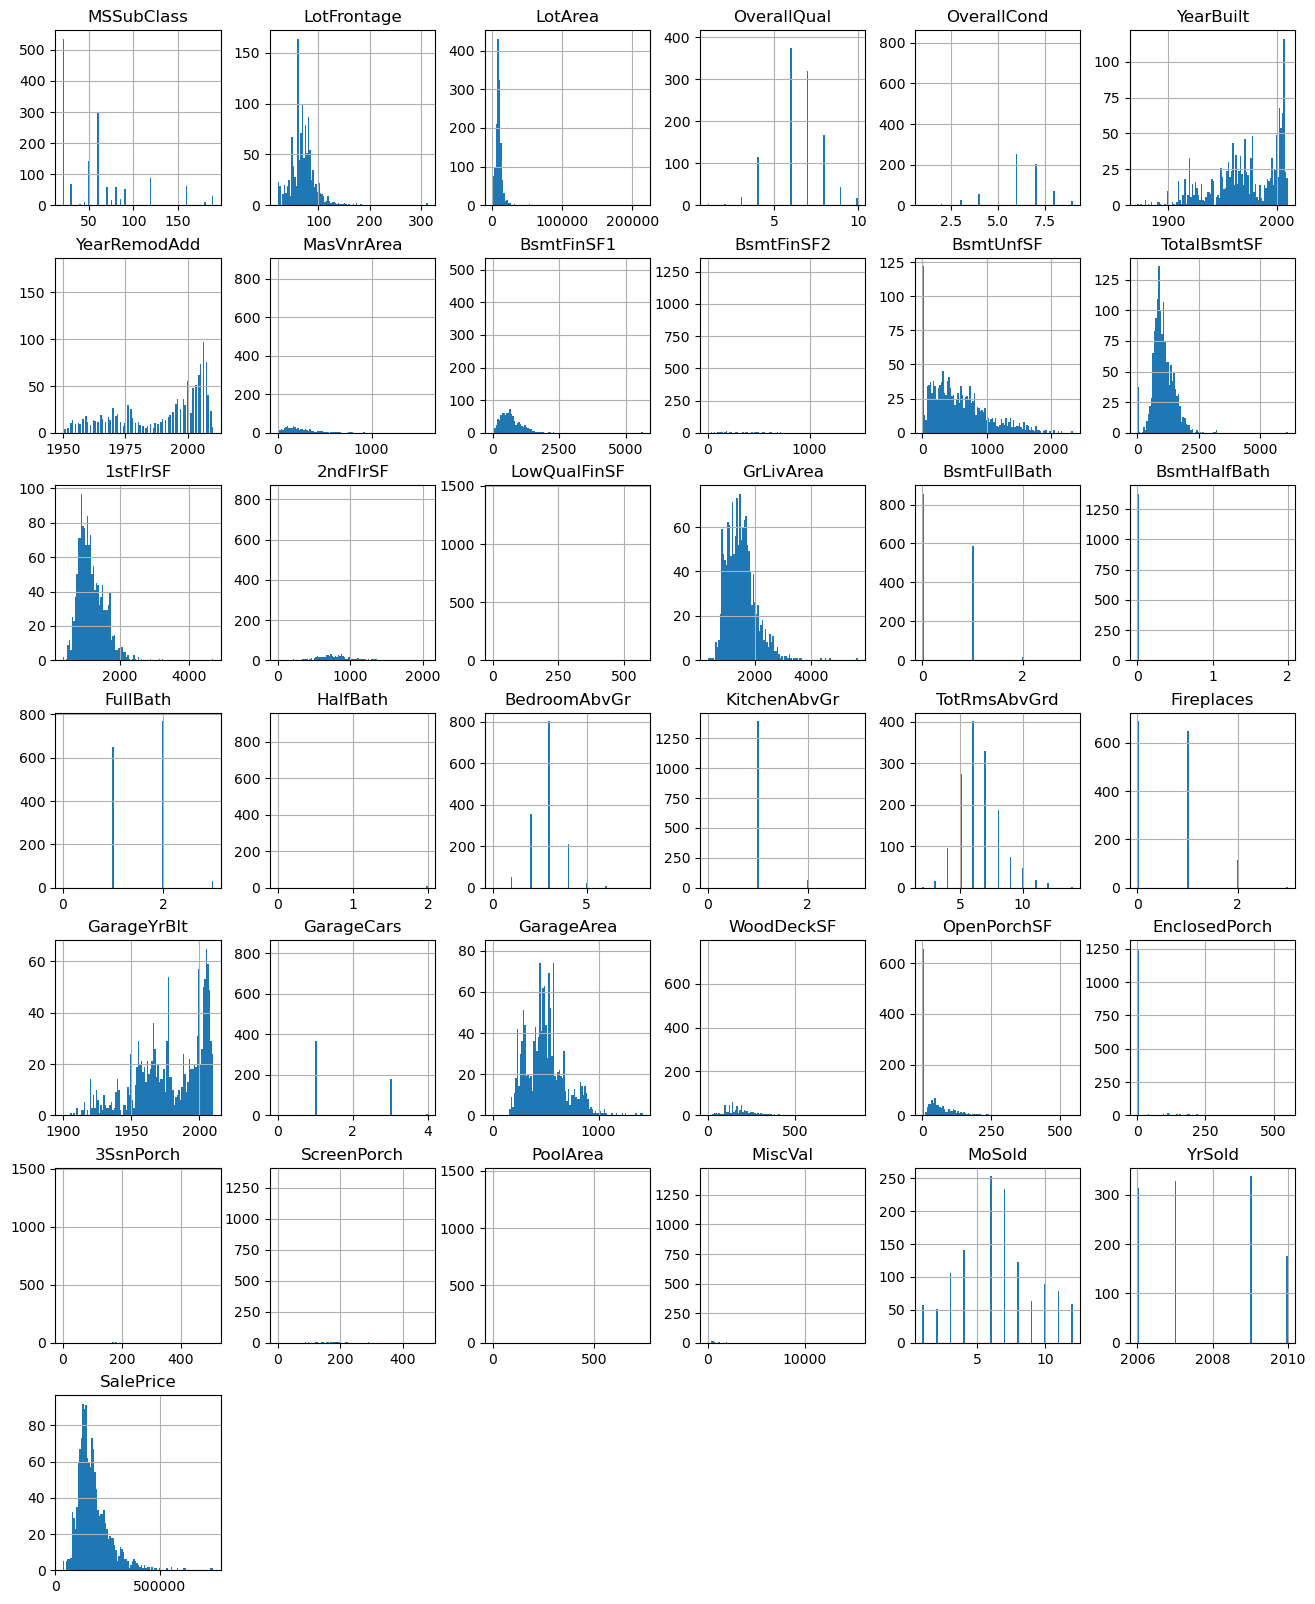

In [9]:
df.hist(figsize=(16, 20), bins=100);

## EDA on Categorical Features

This greated a list that the DataFrame can pass through to create a copy of the exisiting DataFrames with only categorical features and the target variable of `SalePrice`.

In [10]:
categorical = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                     'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                     'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                     'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                     'PavedDrive', 'SaleType', 'SaleCondition']

In [11]:
columns_to_keep = categorical + ['SalePrice']

In [12]:
df_cat = df.loc[:, columns_to_keep].copy() 

In Feature Engineering, it is important to identify relevant columns for the model. with over 40 categorical features avaliable it is important to investigate features that will give us the most value 

An essential step in Feature Engineering is to encode categorical features, we will demonstrate this later on but transforming the data into formats that are required for Machine Learning Algorithms is vital so that they can be processed effectively. This will be detailed later, this next part is to provide insight into the categorical features we have.

Bar charts are useful to see the distribution of uniques values within categorical features, these alongside the Box-plots offer crucial understanding for these features.

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\3585420957.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


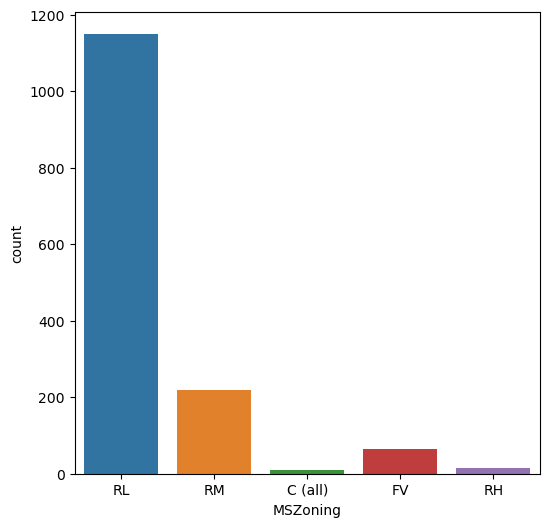

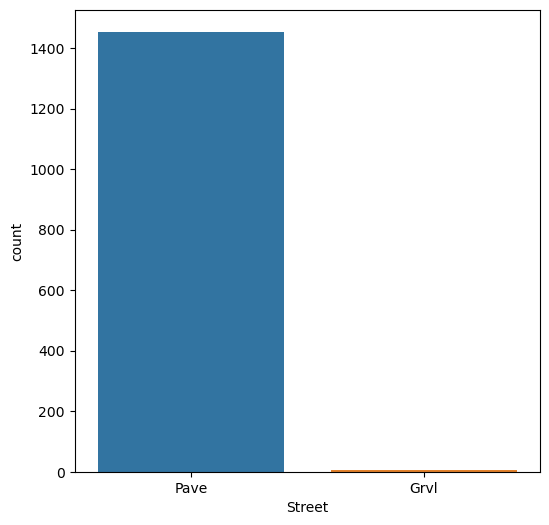

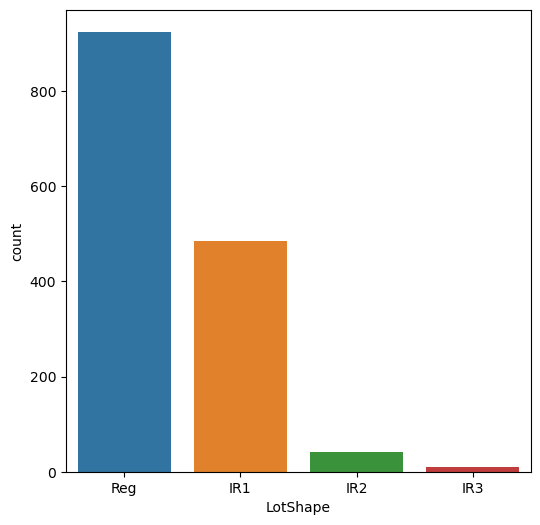

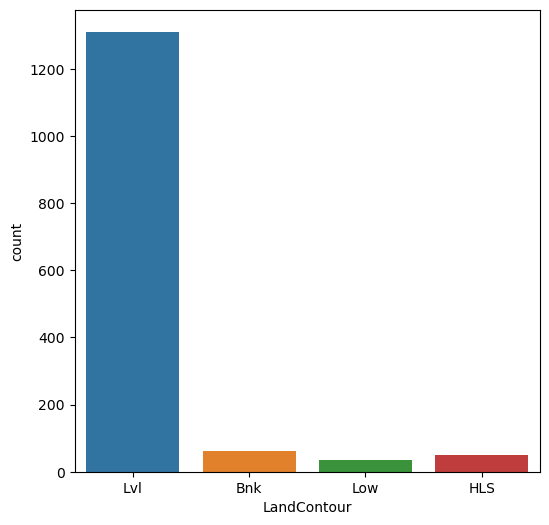

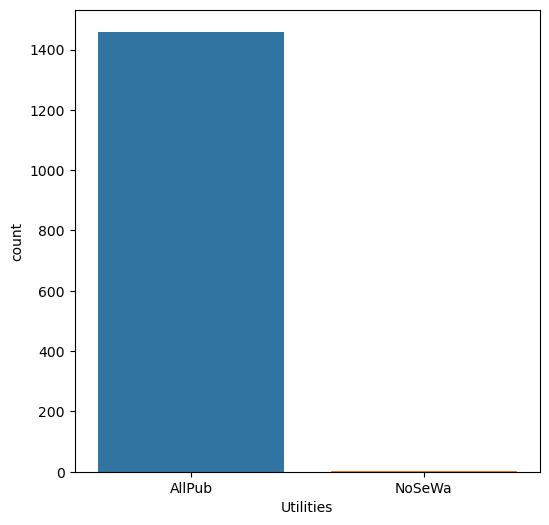

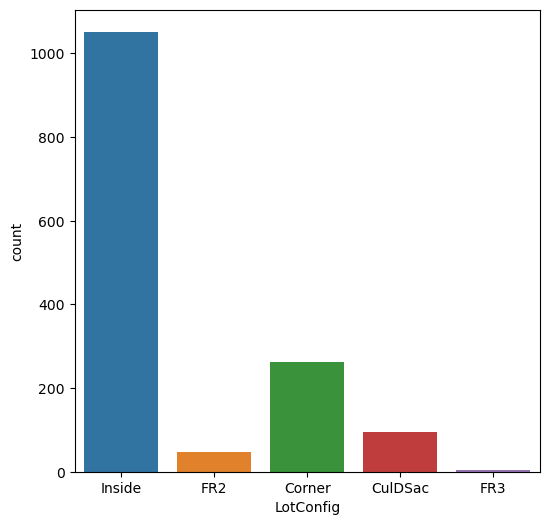

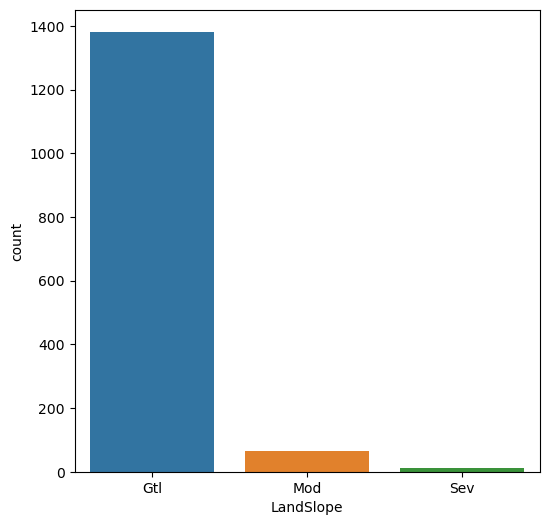

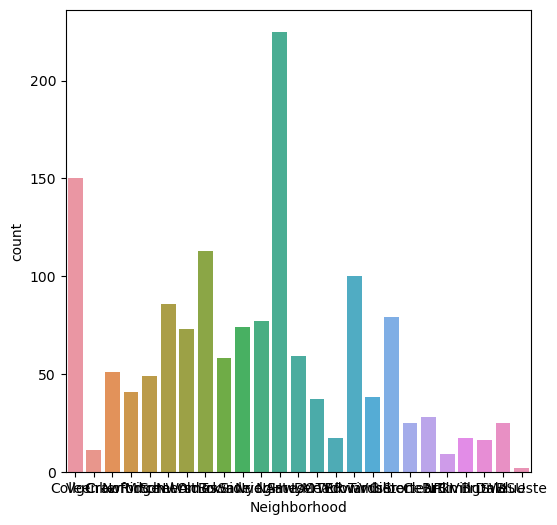

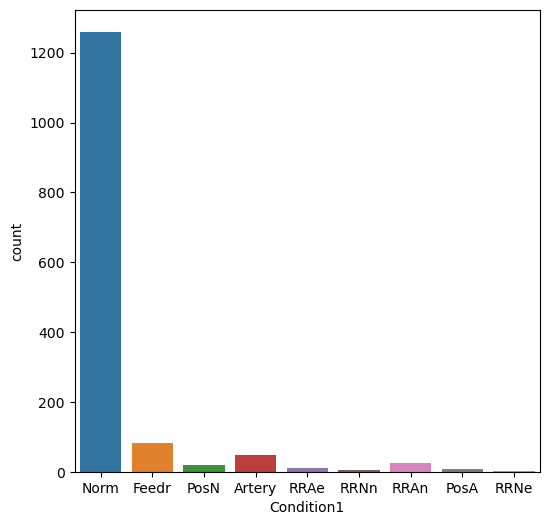

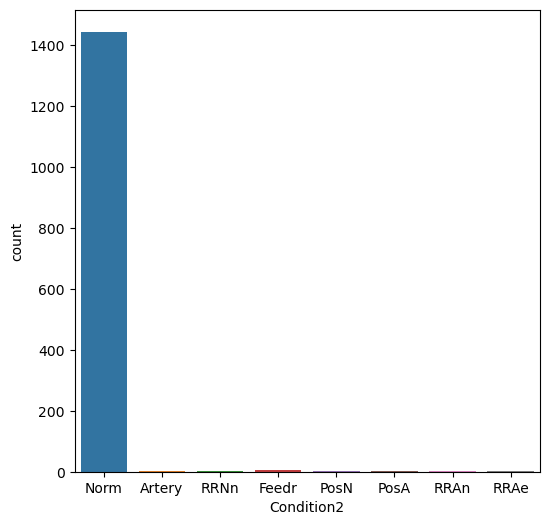

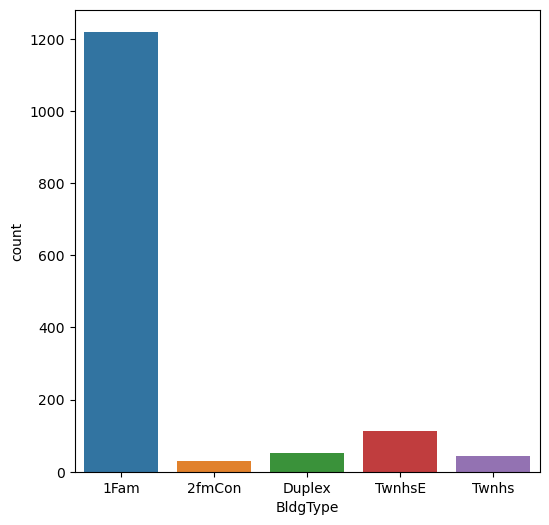

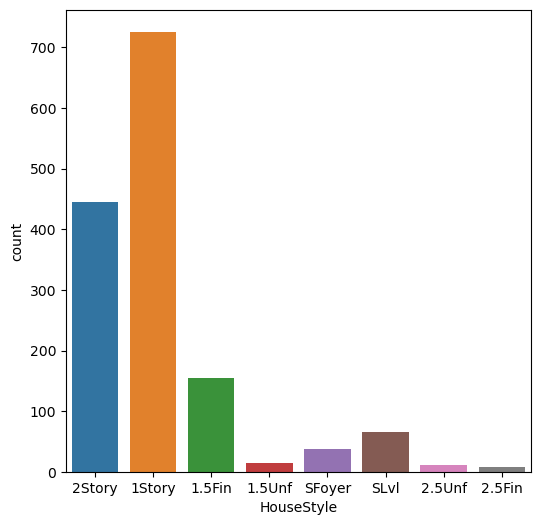

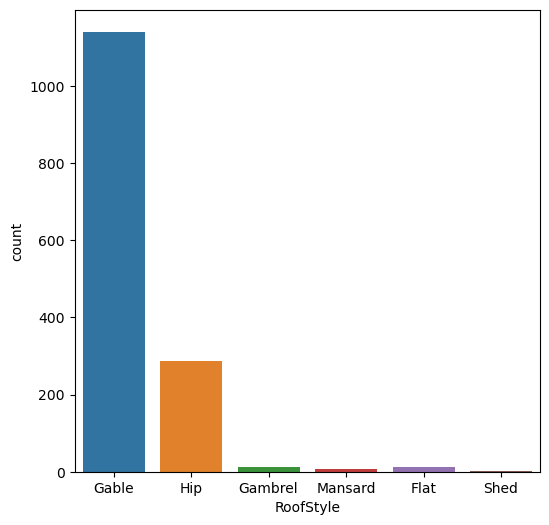

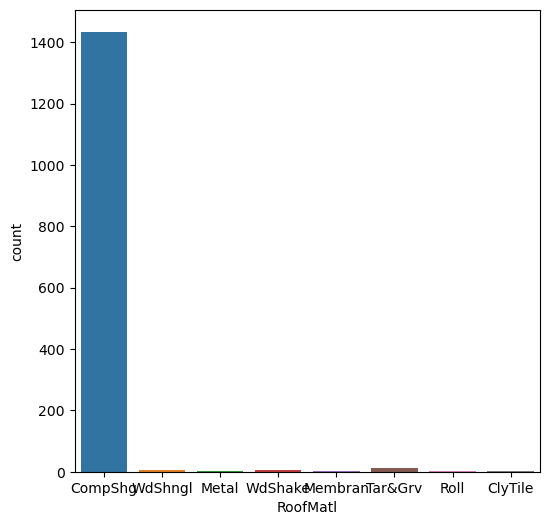

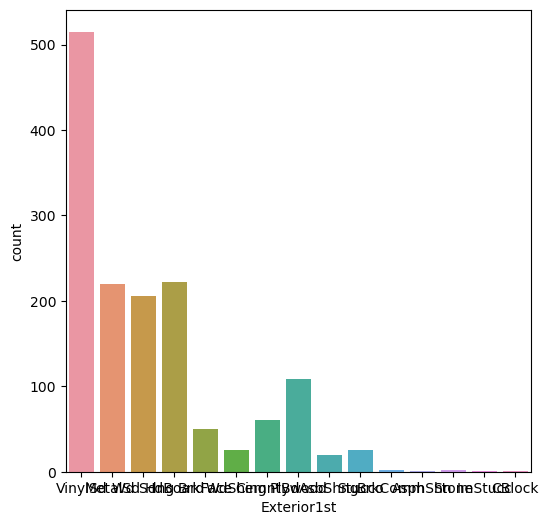

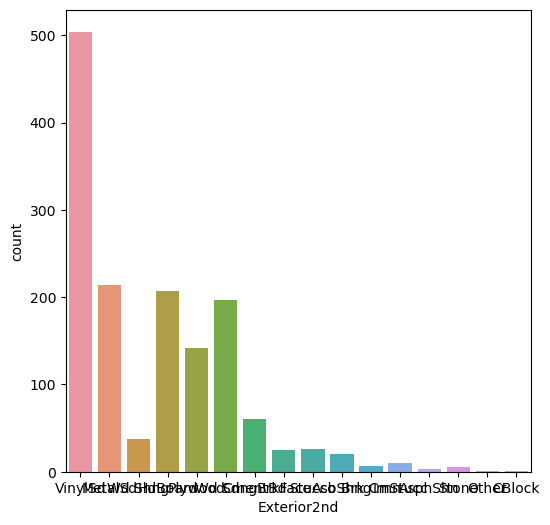

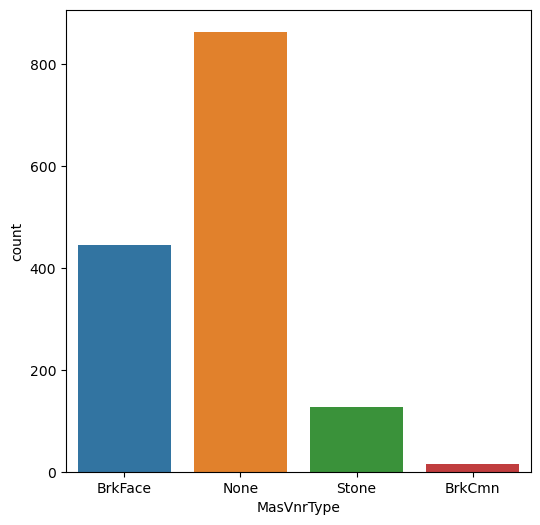

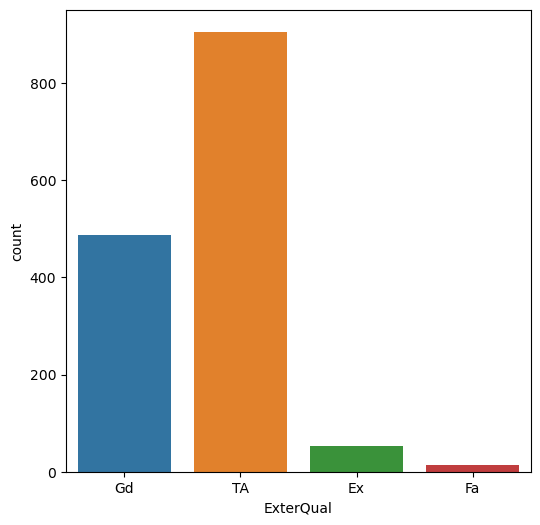

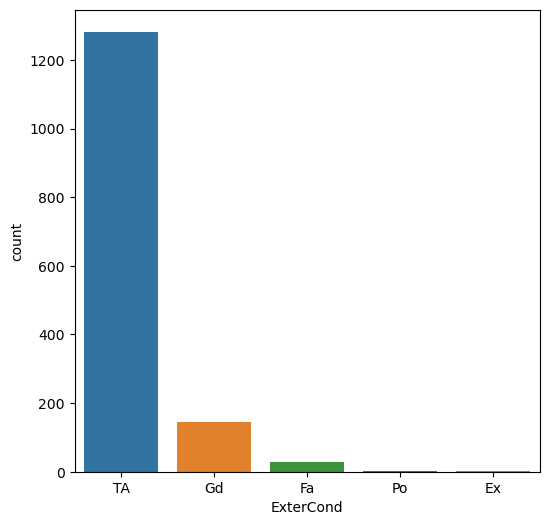

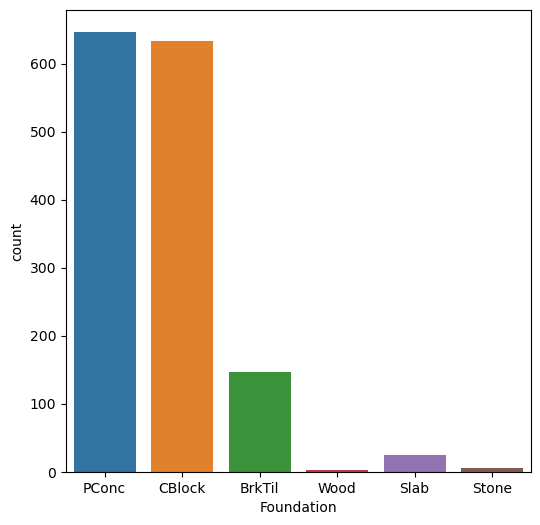

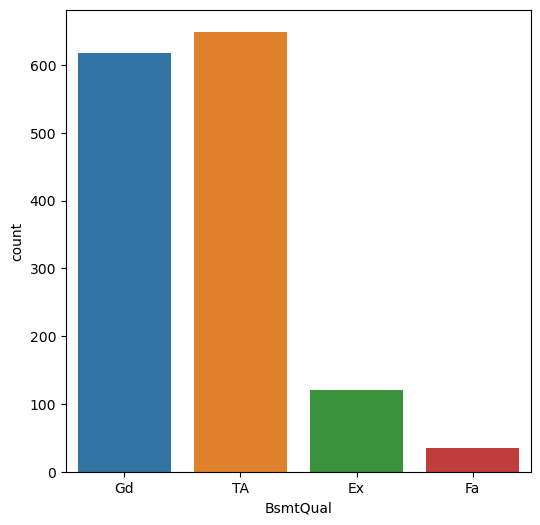

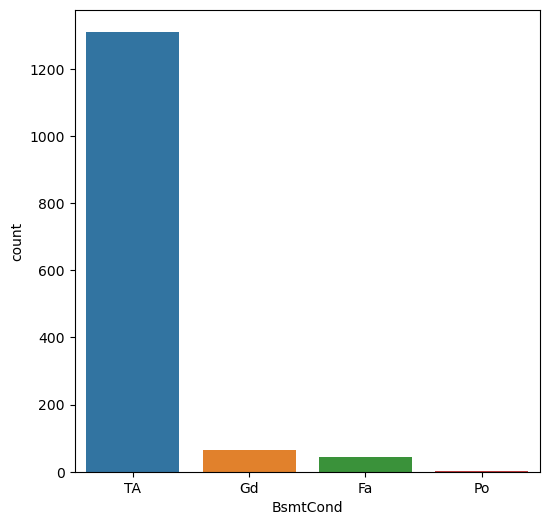

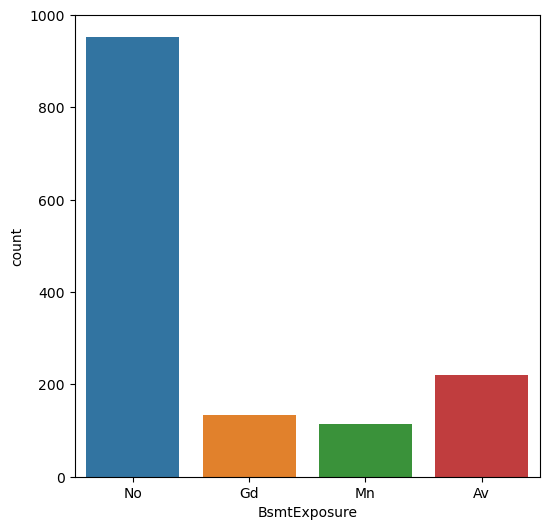

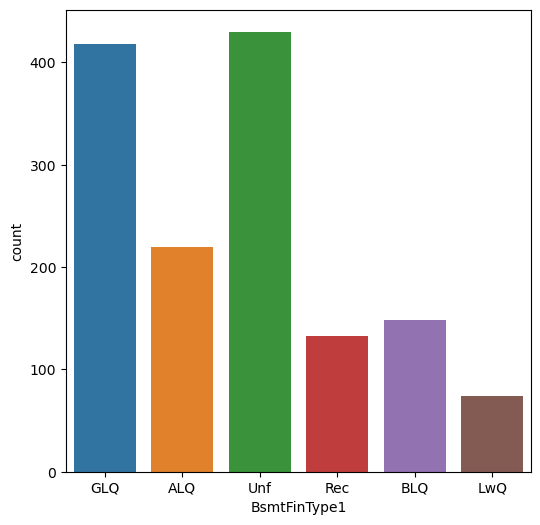

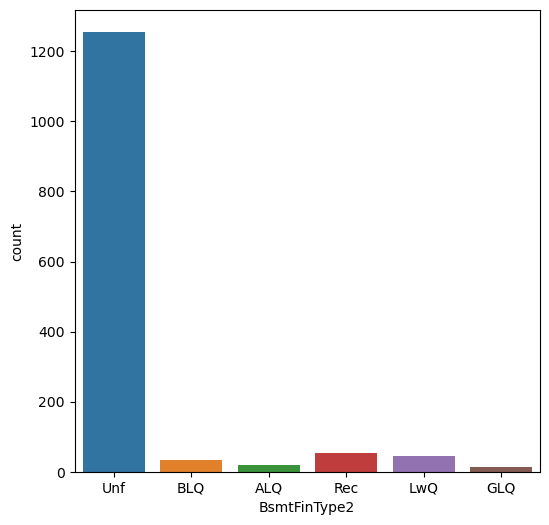

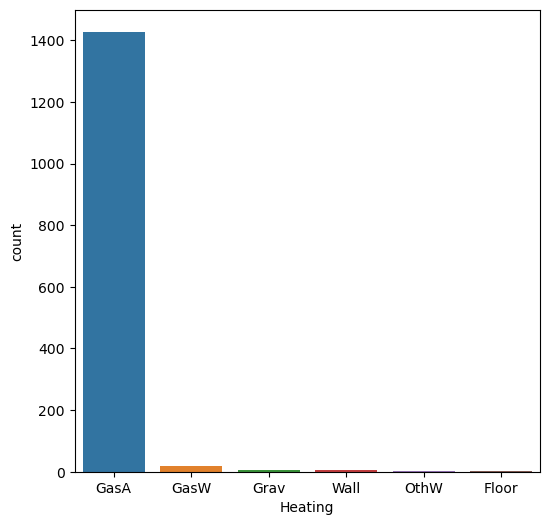

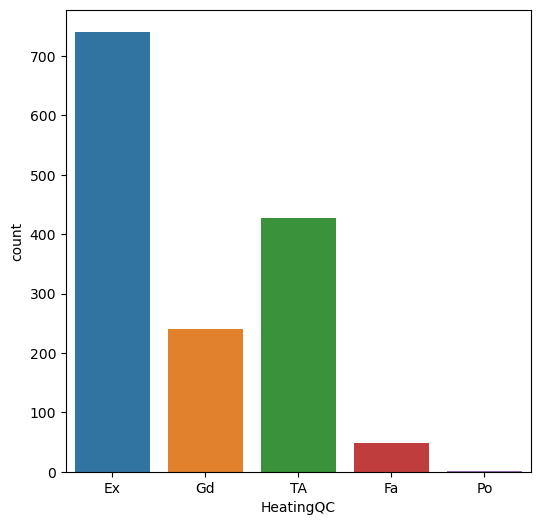

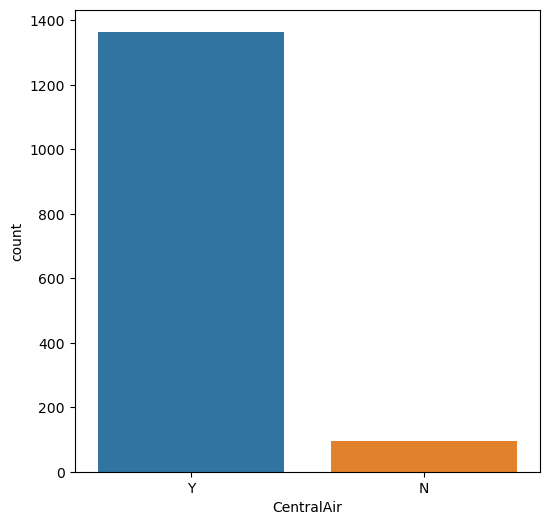

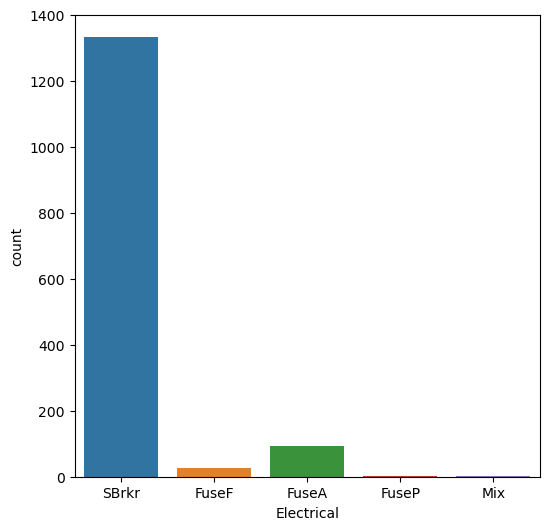

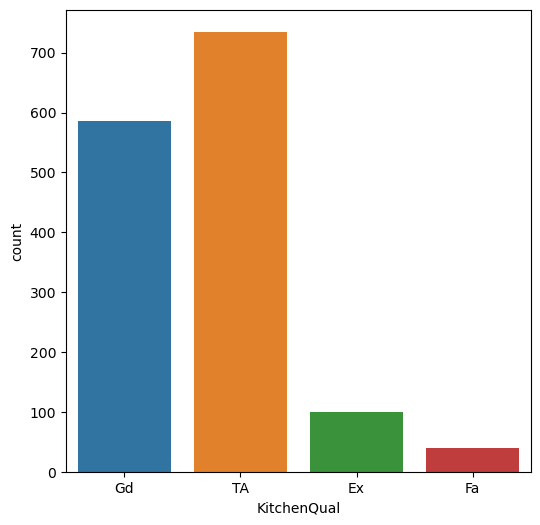

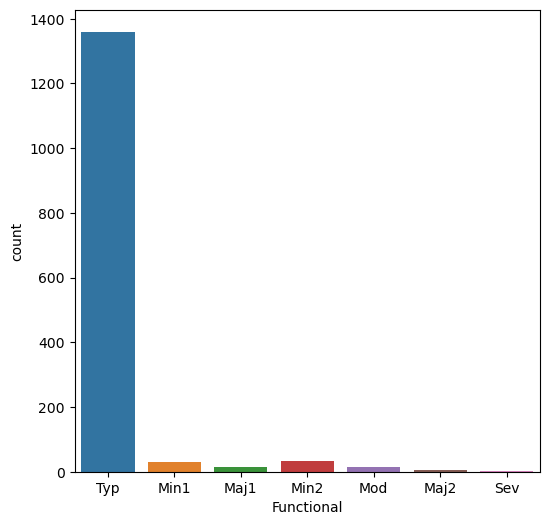

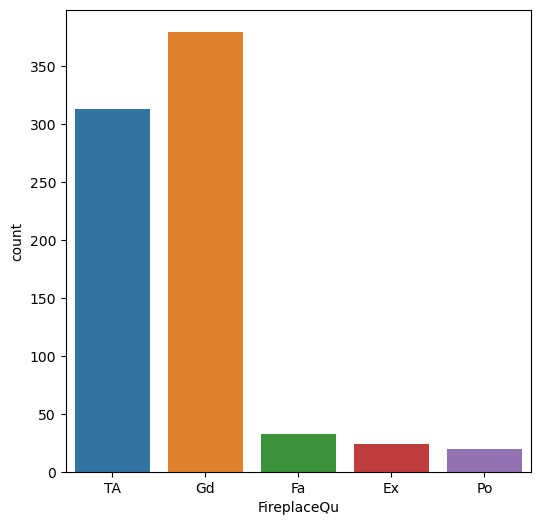

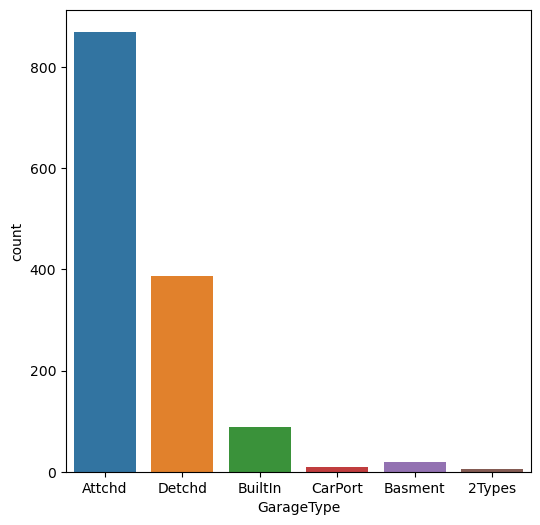

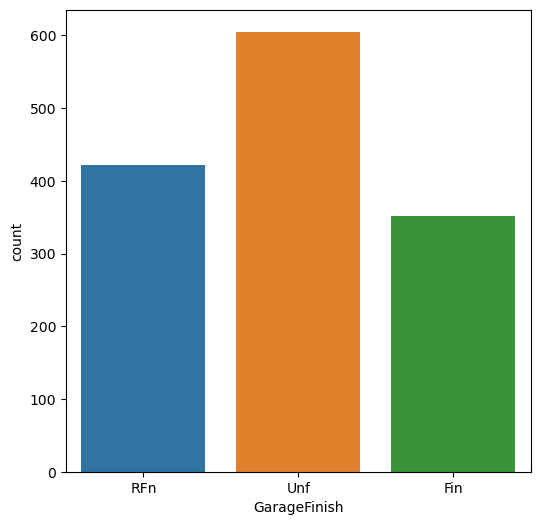

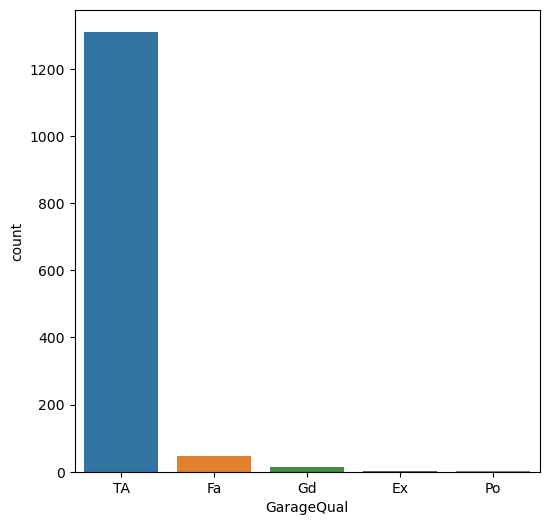

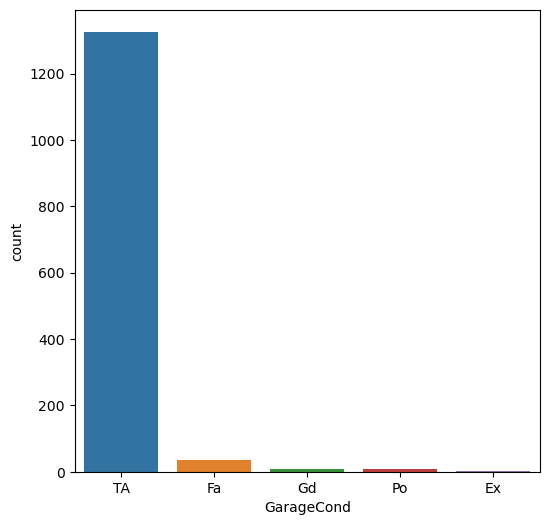

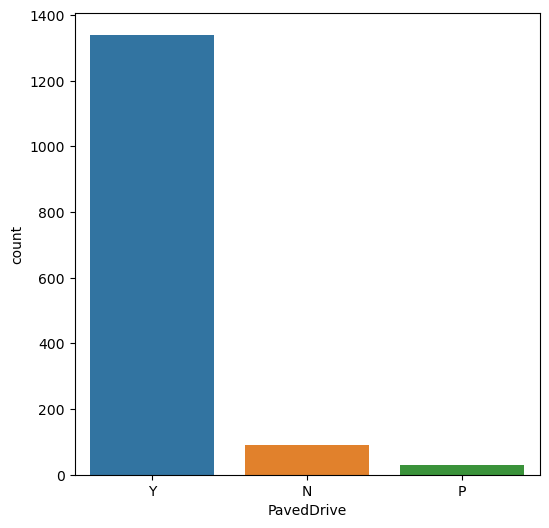

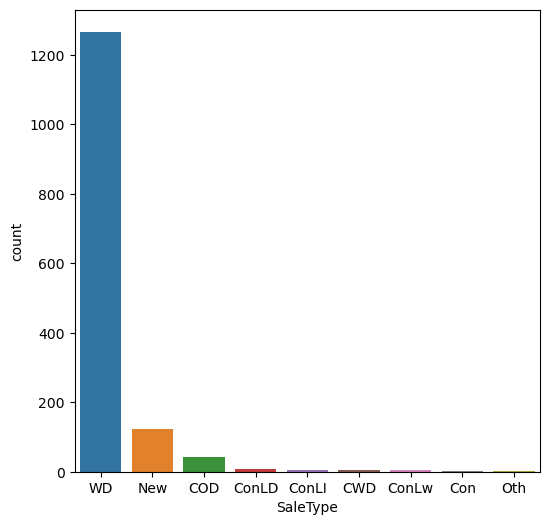

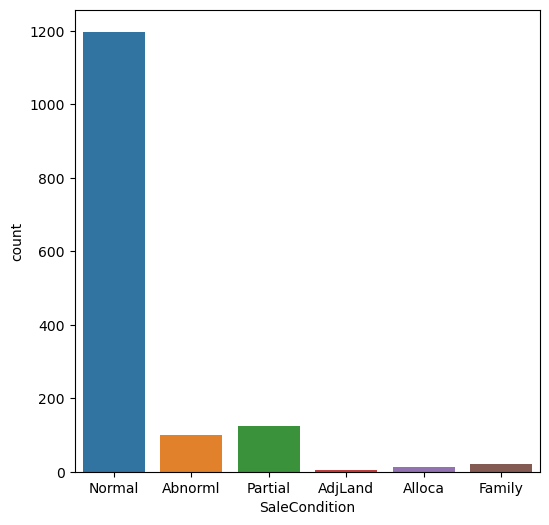

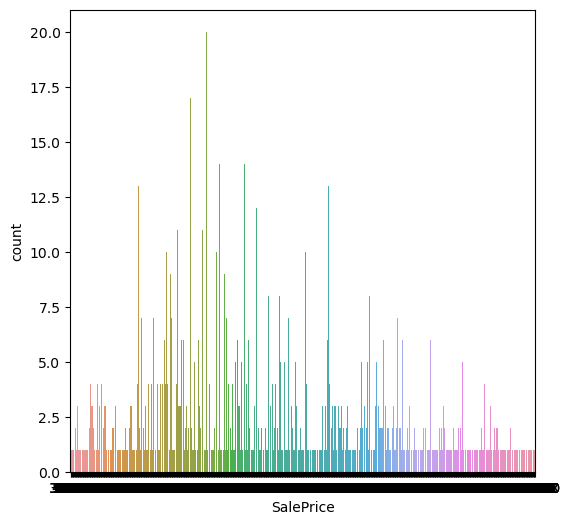

In [13]:
for i in df_cat.columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=df_cat[i], data=df_cat);

Selected categorical features are chosen due to existing domain knowledge or features that will be able to be encoded succesfully without impacting performance.

In [14]:
sel_categories = ['LotConfig','Neighborhood','BldgType','HouseStyle','Exterior1st','ExterQual','BsmtQual','KitchenQual','GarageFinish','SaleType', 'SaleCondition']
df_sel_categories = pd.DataFrame()

In [15]:
for i in sel_categories:
    df_sel_categories[i] = df[i]

df_sel_categories['SalePrice'] = df['SalePrice']

columns_to_keep2 = sel_categories + ['SalePrice']
df_sel_categories = df.loc[:, columns_to_keep2].copy() 

If you can scroll passed the warnings, you can see some box-plots!

C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\4111210924.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\4111210924.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\4111210924.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\4111210924.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
C:\Users\Sam.Sutton\AppData\Local\Continuum\anaconda3\TEMP\ipykernel_760\411

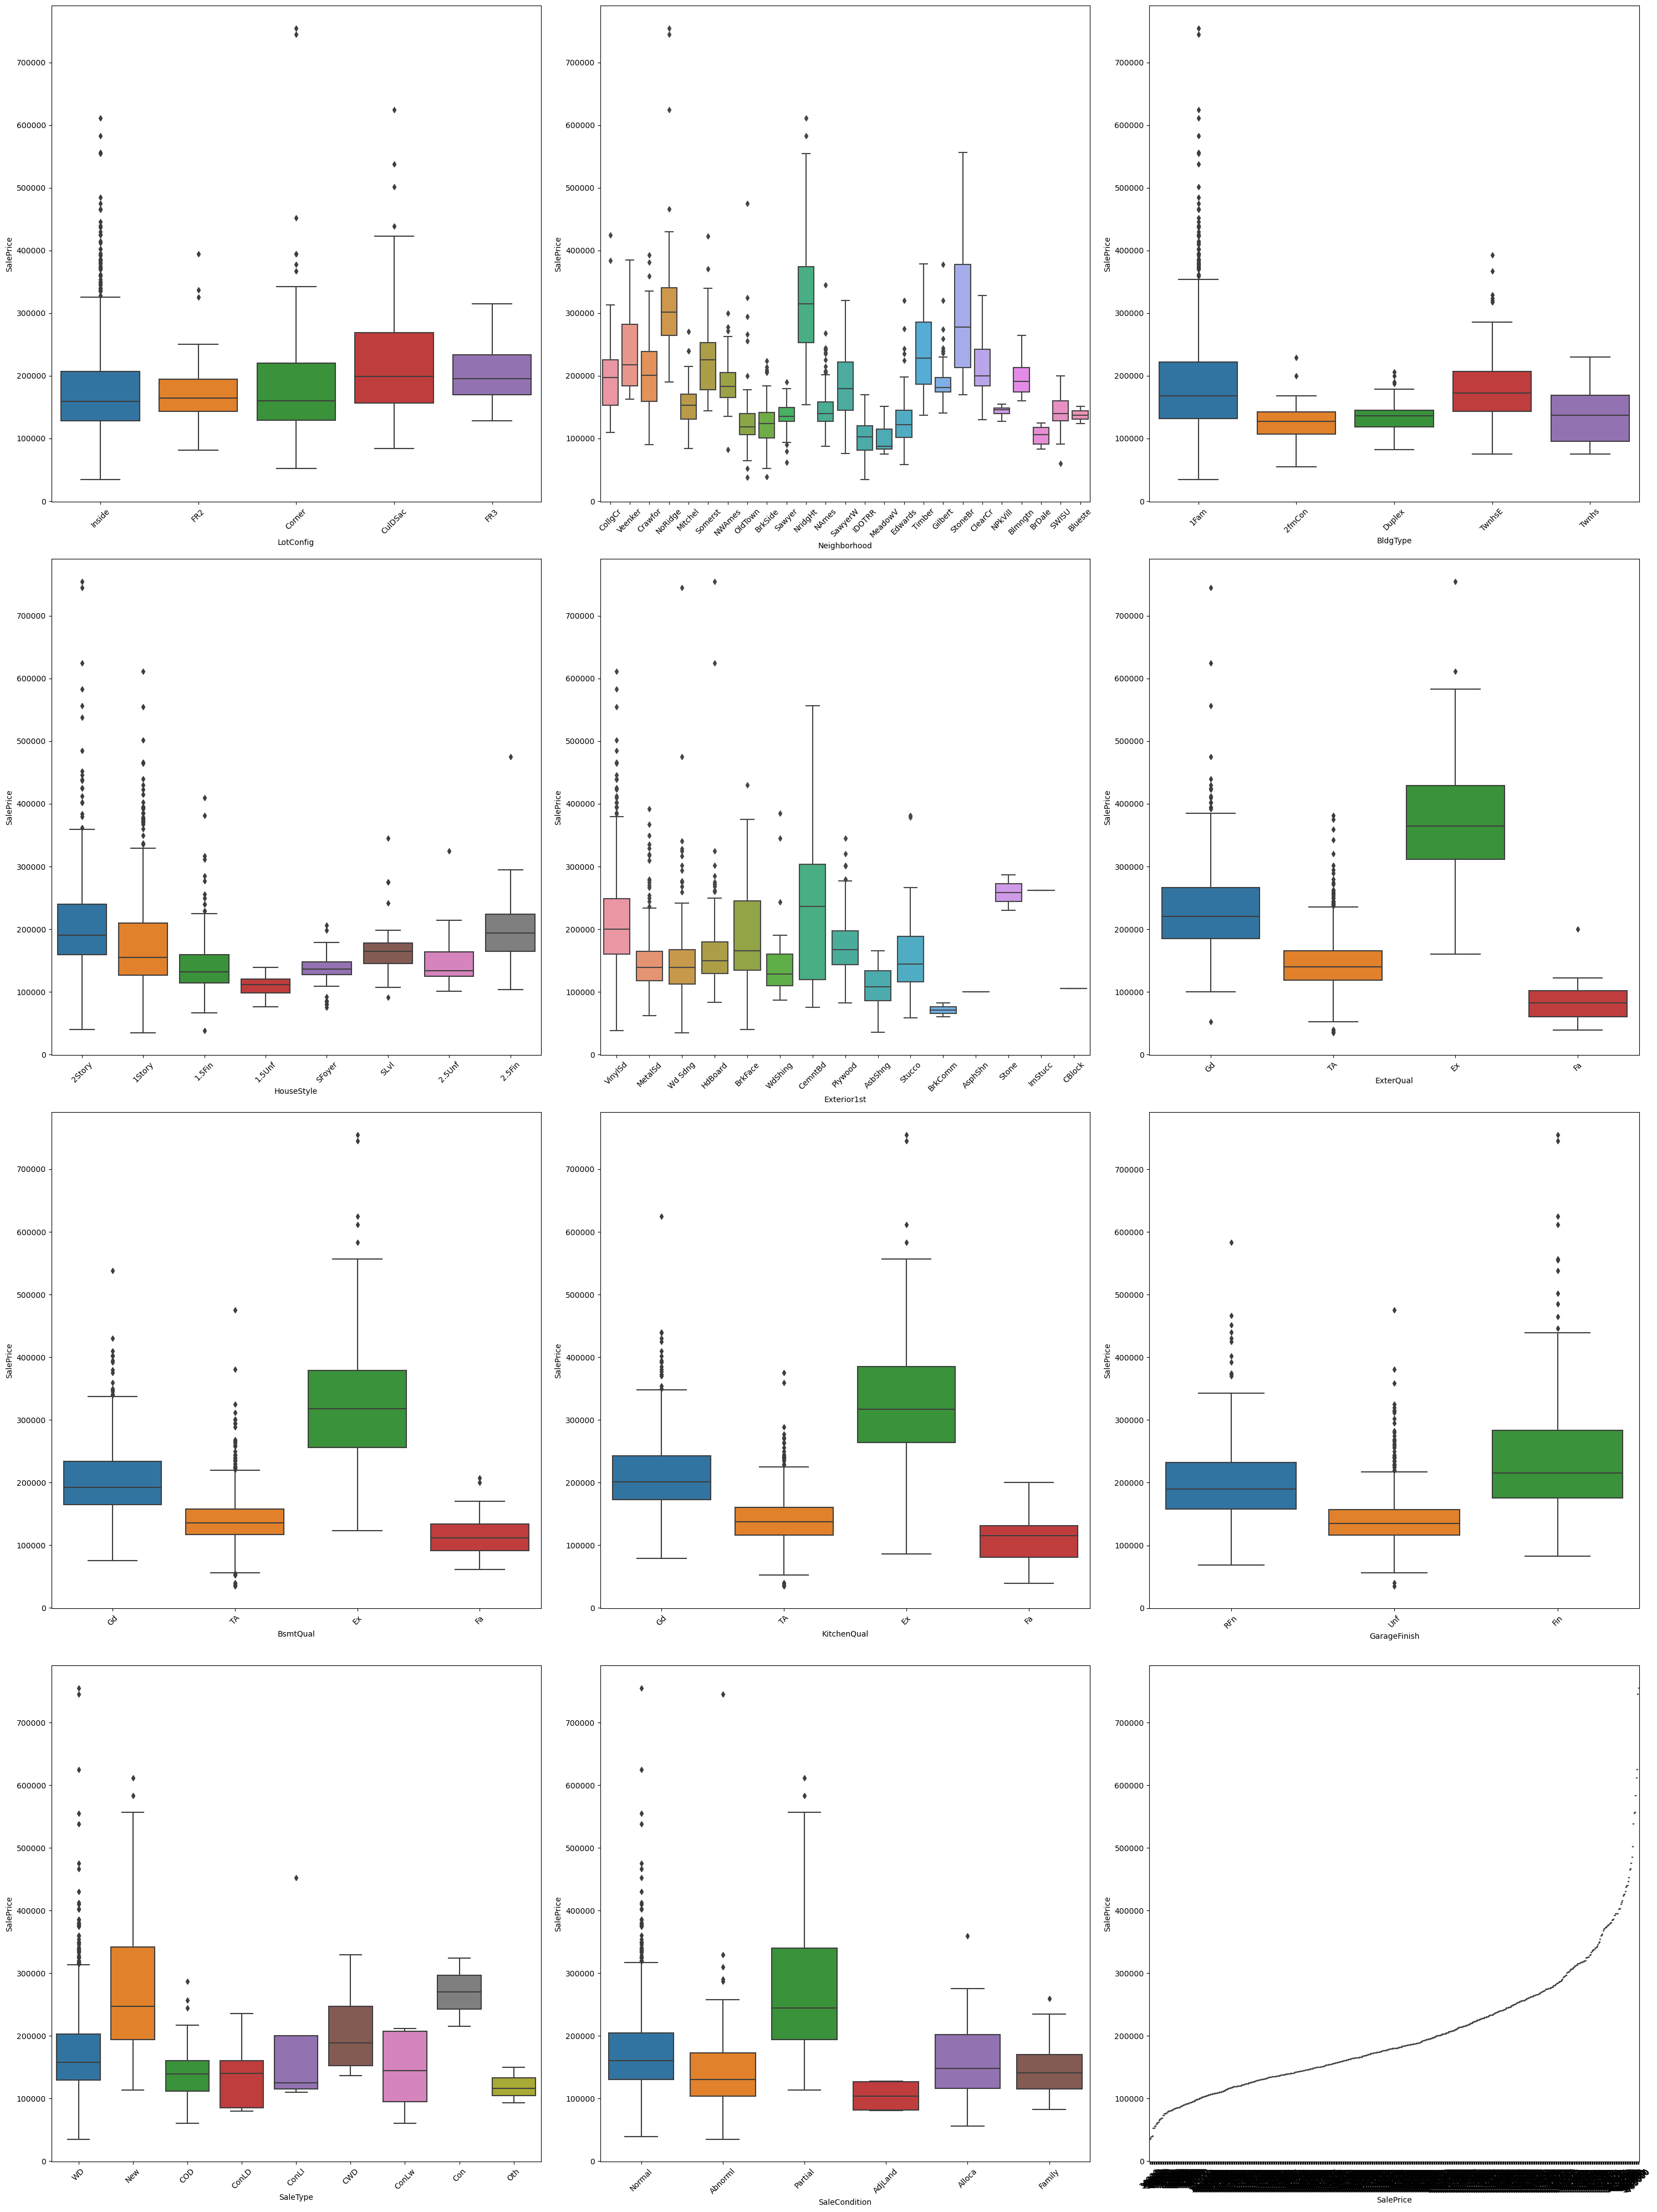

In [16]:
fig, axes = plt.subplots(4, 3, figsize=(30, 40))

for i, ax in enumerate(fig.axes):
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.boxplot(x=df_sel_categories.columns[i], y='SalePrice',data=df_sel_categories, ax=ax)
fig.tight_layout()

## Correlations

Highly correlated features to the target variable `SalePrice` are important as they provide valuable insight into making accurate predictions. Identifying the highly correlated features are important but they have to be mixed with other features to complete a diverse dataset.

For all numerical features we can use the function `.corr()` to establish the correlation between them and the target variable.

In [17]:
df_numerical = df.select_dtypes(include = ['float64', 'int64'])

In [18]:
df_corr=df_numerical.corr()['SalePrice']
df_corr

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

We can also plot the count for each value in the numerical feature against the target variable to visualise the correlation and the distribution of the data. Here we can identify correlated features and outliers in the dataset.

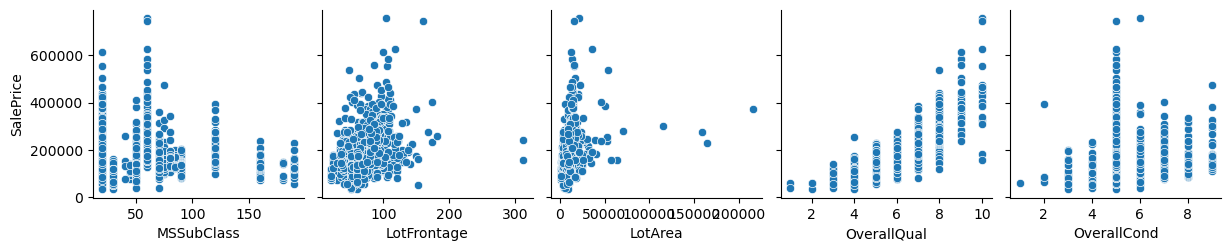

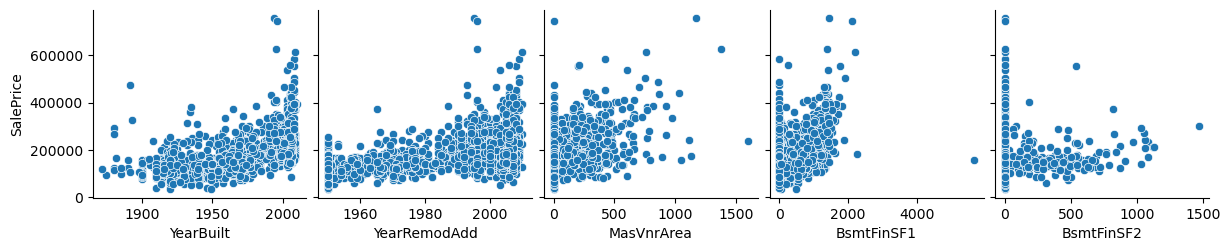

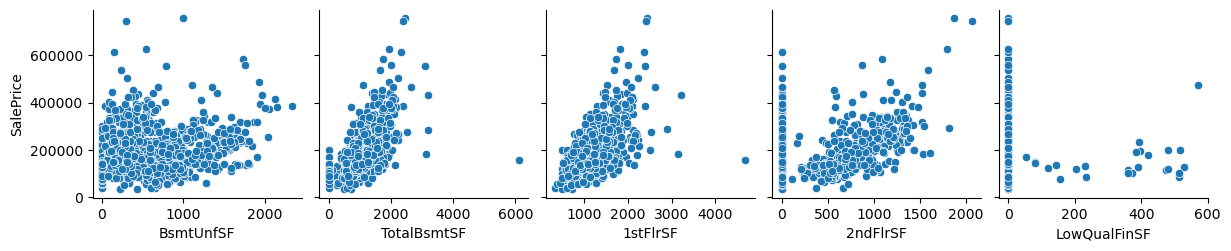

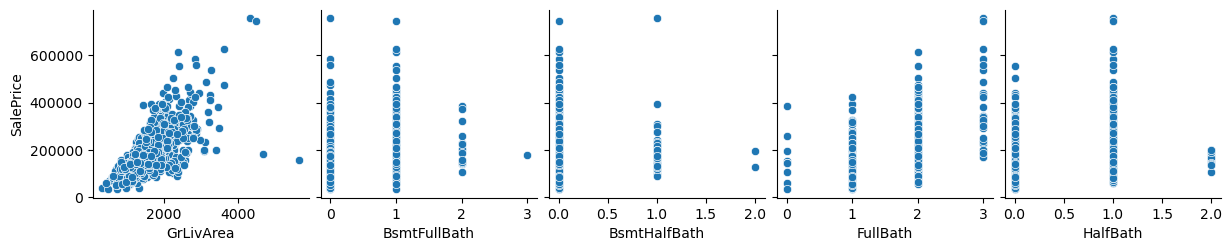

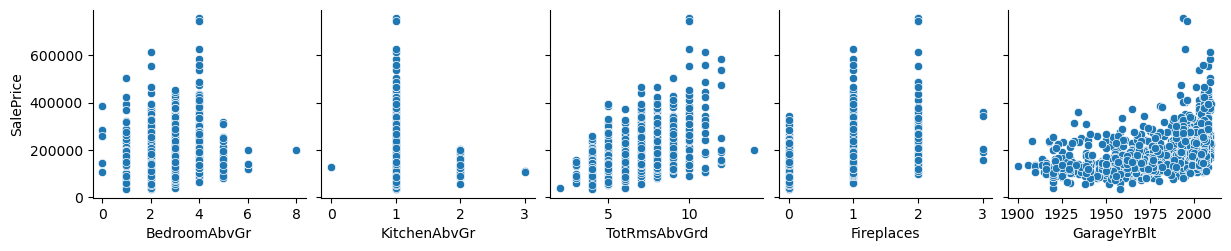

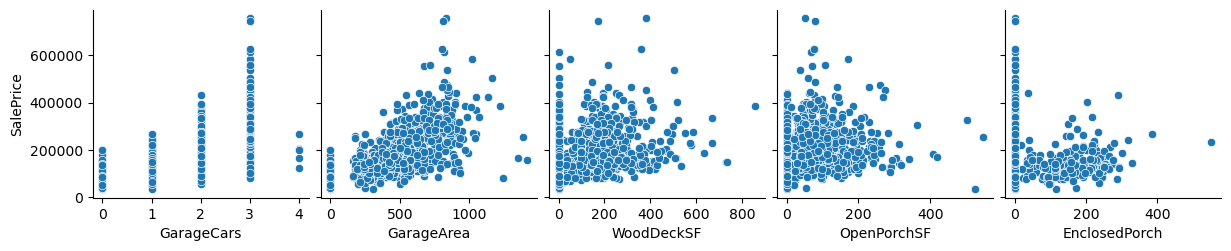

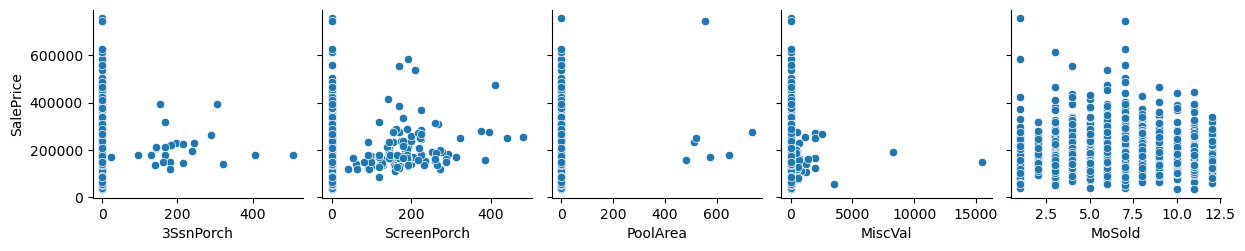

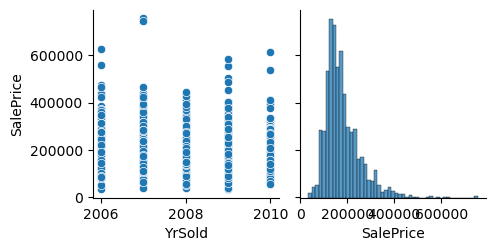

In [19]:
for i in range(0,len(df_numerical.columns),5): 
    sns.pairplot(data=df_numerical,
                 x_vars=df_numerical.columns[i:i+5],
                 y_vars=['SalePrice']);

Finally, we can extract all highly positive correlated features to the target variable with a simple operator function on the absolute value.

In [20]:
df_corr=df_numerical.corr()['SalePrice']
df_corr[abs(df_corr)>0.5]

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

## Independent Correlation

Having independent features that have a strong correlation in a dataset can cause problems, as the model may struggle to isolate the effects of each feature on the target variable. This is called `Multicollinearity`

In [21]:
ind_features = df_numerical.drop(columns = 'SalePrice')

In [22]:
ind_features_corr = ind_features.corr()

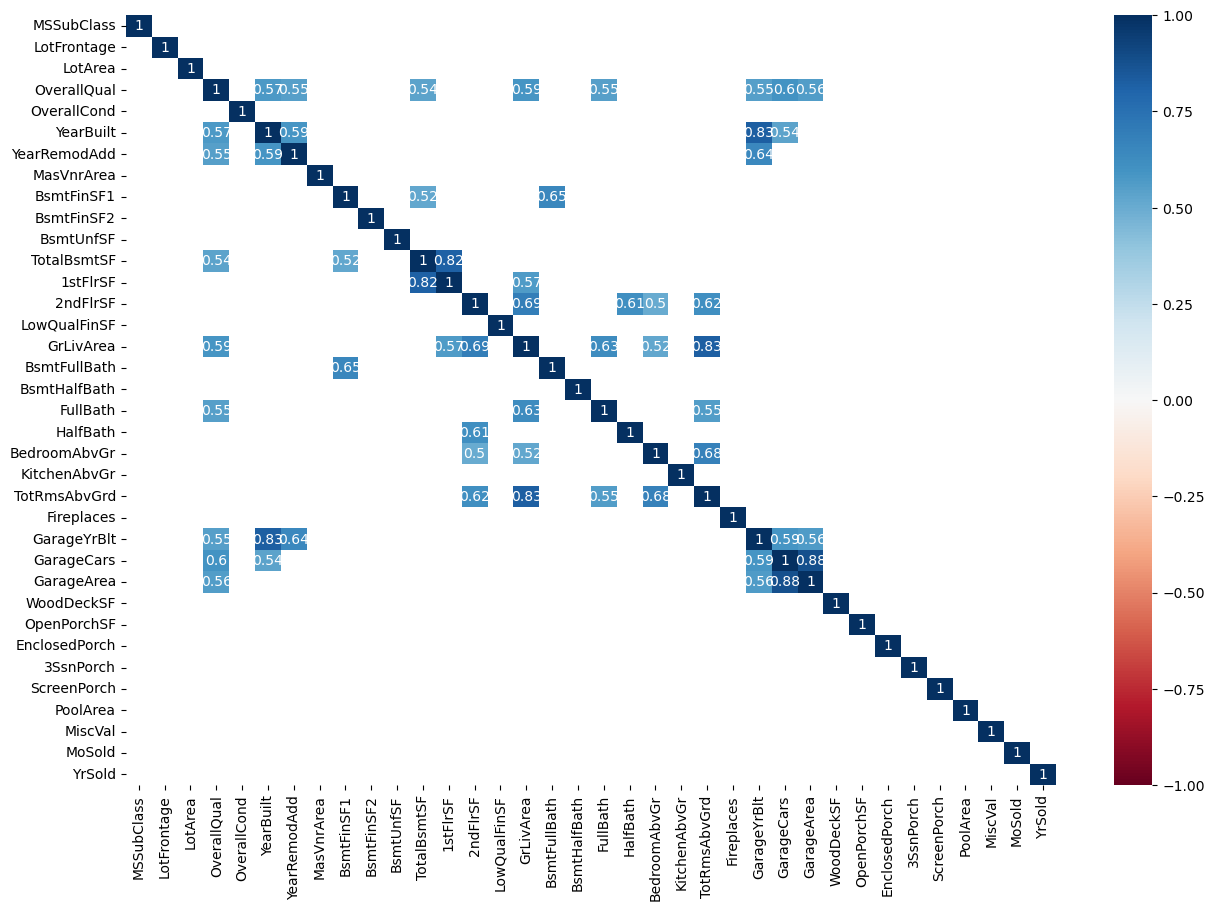

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(ind_features_corr[(ind_features_corr >= 0.50) | (ind_features_corr <= -0.50)], cmap='RdBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 10});

Here can see values that are dependant on each other, which in the context make sense. We have to be careful about using these columns together as the dependance may cause performance issues, we may also combine the features into one. The features include:

- `1stFlrSF` and `TotalBsmtSF`

- `GarageCars` and `GarageArea`

- `GarageYrBlt` and `YearBuilt`

## Encoding Categorical Data

ML Models require numerical data to run. In their nature categorical values do not directly fit into this, therefore, we need to convert them into a suitable format.
 
Two types of encoding we will discuss are:
- Label Encoding
- One Hot Encoding

`Label Encoding` - This assigns a numerical value to each category when there's an inherent order among the values. This is something we will have to be mindful of, especially with House Pricing data.

`One Hot Encoding` - This assigns a binary value based on a True or False statement, which is useful when there isn't many options and there is not a direct order among the valyes.

Other factors we need to be aware of:
- Cardinality: When dealing with a large number of unique values in categories, encoding these values can lead to complexities and performance issues. This is why we will not use some columns.
- Ordinal Relationships: We must ensure that the categories we use, allign well with the inherent order of categories.

From the above EDA stage, we identified useful columns to include in our dataset, these include: `LotConfig`, `Neighborhood`, `BldgType`, `HouseStyle`, `Exterior1st`, `ExterQual`, `BsmtQual`, `KitchenQual`, `GarageFinish`, `SaleType` and `SaleCondition`.

It is important to understand the issues discussed earler and the relevance to the model within the given context. Due to this, it was decided that the following columns can be treated ordinally and without the concern of high cardinality:
- `LotConfig`
- `BldgType`

The below code, finds the unique values in each category we want to encode. From there we have to encode in an ordinal fashion and then use the `map` function to replace the existing values in the data frame. 

In [24]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [25]:
map_lot = {"Inside" : 1, "Corner": 2, "FR2": 3, "FR3": 4, "CulDSac":5}

In [26]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [27]:
map_bldg = {"2fmCon" : 1, "Duplex": 2, "Twnhs": 3, "TwnhsE": 4, "1Fam":5}

In [28]:
df['LotConfig'] = df['LotConfig'].map(map_lot)
df['BldgType'] = df['BldgType'].map(map_bldg)

In [29]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,1,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,3,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,1,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,2,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,3,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Drop Data
and load into other CSV file

The refined dataset that will be used in the Machine Learning model will consist of columns gathered on various types of analysis shown above, these include:

Columns that are independent and positively correlated with `SalePrice`:
- `OverallQual`
- `YearBuilt`
- `YearRemodAdd`
- `TotalBsmtSF`
- `1stFlrSF`
- `GrLivArea`
- `FullBath`
- `TotRmsAbvGrd`
- `GarageCars`
- `GarageArea`

Columns extracted from analysis of Categorical columns:
- `LotConfig`
- `BldgType`

Columns extracted from Domain Knowledge:
- `LotArea`
- `OverallCond`
- `2ndFlrSF`
- `BedroomAbvGr`
- `Fireplaces`
- `EnclosedPorch`
- `OpenPorchSF`
- `WoodDeckSF`
- `HalfBath`

These values were not extracted as positively correlated with `SalePrice`. However, domain knowledge recognises them as important factors but due to domain knowledge for affecting house prices. These will include cosmetic improvements, the number of bedrooms and general surface area of key parts of a property.

Incorparating various correlation types allow the capture of diverse relationships. This helps the model to recognise relevant information and become robust to changes in the data.

In [30]:
refined_df = df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','LotConfig','BldgType','LotArea','OverallCond','2ndFlrSF','BedroomAbvGr','Fireplaces','EnclosedPorch','OpenPorchSF','WoodDeckSF','HalfBath','SalePrice']]

The code below writes the refined dataset to a new CSV file, to be used in the ML model

In [31]:
refined_df.to_csv('data/refined_data.csv',index=False)